In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow import keras


EPOCHS = 50
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
VERBOSE = 1 
NB_CLASSES = 10
N_HIDDEN = 128

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, Y_train), (X_valid, Y_valid) = mnist.load_data()

findfont: Font family ['NanumBarunpenRegular'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunpenRegular'] not found. Falling back to DejaVu Sans.


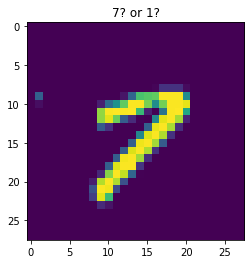

7


In [3]:
import matplotlib.pyplot as plt

plt.imshow(X_train[29])
plt.title('7? or 1?')
plt.show()

print(Y_train[29])

In [4]:
#이미지를 전부 1차원 벡터로 치환
RESHAPE = 784

X_train = X_train.reshape(60000, RESHAPE)
X_valid = X_valid.reshape(10000, RESHAPE)

X_trian = X_train.astype('float32')
X_valid = X_valid.astype('float32')

In [5]:
X_train, X_valid = X_train/255. , X_valid/ 255.

In [6]:
Y_train = keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_valid = keras.utils.to_categorical(Y_valid, NB_CLASSES)

In [7]:
model = Sequential()

model.add(keras.layers.Dense(N_HIDDEN, 
                             input_shape = (RESHAPE,), 
                             activation = 'relu',
                             name = 'dense_layer'))

model.add(keras.layers.Dropout(0.3))

# model.add(keras.layers.Dense(N_HIDDEN , 
#                              activation= 'relu',
#                              name = 'dense_layer_2'))

# model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(NB_CLASSES,
                             activation='softmax',
                             name = 'dense_layer_3'))

model.add(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                1290      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer= 'SGD',
              loss = 'categorical_crossentropy',
              metrics= ['accuracy'])

In [ ]:
model.fit(X_train,
          Y_train,
          epochs= EPOCHS,
          batch_size= BATCH_SIZE, 
          verbose= VERBOSE,
          validation_split= VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50


In [9]:
def linear_layer(x):
    return 3*x + 2

@tf.function
def simple_nn(x):
    return tf.nn.relu(linear_layer(x))

def simple_function(x):
    return 3*x

In [10]:
simple_nn

In [11]:
simple_function

<function __main__.simple_function(x)>

In [12]:
print(tf.autograph.to_code(simple_nn.python_function, experimental_optional_features=None))

def tf__simple_nn(x):
  do_return = False
  retval_ = ag__.UndefinedReturnValue()
  with ag__.FunctionScope('simple_nn', 'simple_nn_scope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as simple_nn_scope:
    do_return = True
    retval_ = simple_nn_scope.mark_return_value(ag__.converted_call(tf.nn.relu, simple_nn_scope.callopts, (ag__.converted_call(linear_layer, simple_nn_scope.callopts, (x,), None, simple_nn_scope),), None, simple_nn_scope))
  do_return,
  return ag__.retval(retval_)



In [ ]:
import timeit

cell = tf.keras.layers.LSTMCell(100)

@tf.function
def fn(input_a, state):
    return cell(input_a,state)

input_a = tf.zeros([100,100])
state = [tf.zeros([100,100])] * 2

cell(input_a, state)
fn(input_a, state)

graph_time = timeit.timeit(lambda: cell(input_a, state), number= 100)
auto_graph_time = timeit.timeit(lambda: fn(input_a, state), number= 100)

print('graph_time:', graph_time)
print('auto_grapg_time:', auto_graph_time)

In [1]:
graph_time/auto_graph_time

NameError: name 'graph_time' is not defined

In [6]:
def build_model():
    text_input_a = tf.keras.Input(shape=(None,), dtype= 'int32')
    
    text_input_b = tf.keras.Input(shape=(None,), dtype= 'int32')
    
    shared_embedding = tf.keras.layers.Embedding(1000,128)
    
    encoded_input_a = shared_embedding(text_input_a)
    encoded_input_b = shared_embedding(text_input_b)
    
    prediction_a = tf.keras.layers.Dense(1, activation= 'sigmoid', name= 'prediction_a')(encoded_input_a)
    
    prediction_b = tf.keras.layers.Dense(1, activation= 'sigmoid', name= 'prediction_b')(encoded_input_b)
    
    model = tf.keras.Model(inputs= [text_input_a, text_input_b], outputs= [prediction_a, prediction_b])
    
    tf.keras.utils.plot_model(model, to_file= 'shred_model.png')
    print(model)
    
    
build_model()

In [7]:
from tensorflow.keras import layers
class MyLayer(layers.Layer):
    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(MyLayer,self).__init__(**kwargs)
        
    def build(self, input_shape):
        self.kernel = self.add_weight(name = 'kernel', 
                                      shape=(input_shape[1], self.output_dim),
                                      initializer= 'uniform', 
                                      trainable= True)
        
    def call(self,inputs):
        return tf.matmul(inputs, self.kernel)
    
    

In [8]:
model = tf.keras.Sequential([MyLayer(20), layers.Activation('softmax')])

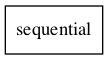

In [9]:
from tensorflow.keras.utils import plot_model

plot_model(model)

In [10]:
model.inputs

[]

In [11]:
num_list = np.arange(100)

num_list_dataset = tf.data.Dataset.from_tensor_slices(num_list)

In [12]:
num_list_dataset

<TensorSliceDataset shapes: (), types: tf.int64>

In [13]:
num_list_dataset.range(10)

<RangeDataset shapes: (), types: tf.int64>

In [14]:
x = tf.constant(4.0)
with tf.GradientTape(persistent= True) as g:
    g.watch(x)
    
    y = x*x
    z = y*y
    
    dz_dx = g.gradient(z,x)
    dy_dx = g.gradient(y,x)
        
    print(dz_dx)
    print(dy_dx)
    del g

tf.Tensor(256.0, shape=(), dtype=float32)
tf.Tensor(8.0, shape=(), dtype=float32)


In [4]:
import pandas as pd

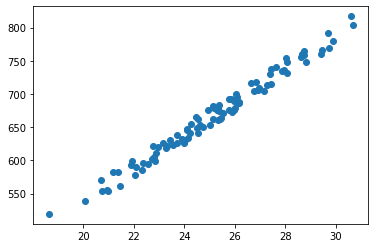

In [15]:
np.random.seed(0)
area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20,50,size = len(area))

data = np.array([area,price])

data_frame = pd.DataFrame(data=data.T, columns=['area', 'price'])
plt.scatter(data_frame['area'], data_frame['price'])

In [38]:
W = sum(price * (area - np.mean(area))) / sum((area - np.mean(area)) ** 2)
b = np.mean(price) - W*np.mean(area)

In [42]:
y_pred = W*area + b

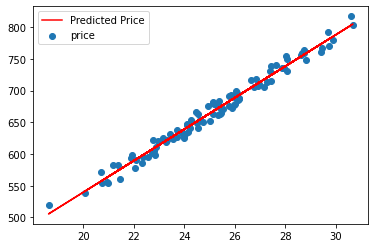

In [47]:
plt.plot(area, y_pred, color = 'red', label = 'Predicted Price')
plt.scatter(data_frame['area'], data_frame['price'], label = 'price')
plt.legend()

In [68]:
area = tf.feature_column.numeric_column('area')
bucket = tf.feature_column.bucketized_column(area, [23, 27])

In [103]:
from tensorflow import feature_column as fc
from tensorflow.keras.datasets import boston_housing

(x_train, y_train), (x_valid, y_valid) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [104]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
            'PTRATIO', 'B', 'LSTAT']

x_train_df = pd.DataFrame(x_train, columns=features)
x_valid_df = pd.DataFrame(x_valid, columns= features)

y_train_df = pd.DataFrame(y_train, columns= ['MEDV'])
y_valid_df = pd.DataFrame(y_valid, columns= ['MEDV'])

x_train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [105]:
feature_col = []

for feature in features:
    feature_col.append(fc.numeric_column(feature, dtype=tf.float32))

In [139]:
def estimator_input_fc(df_data, df_label, epochs = 50, shuffle = True, batch_size = 32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(df_data), df_label))
        if shuffle:
            ds = ds.shuffle(100)
        ds = ds.batch(batch_size).repeat(epochs)
        return ds
    return input_function

train_input_fn = estimator_input_fc(x_train_df, y_train_df)
valid_input_fn = estimator_input_fc(x_valid_df, y_valid_df, epochs= 10, shuffle = False)

In [133]:
linear_est = tf.estimator.LinearRegressor(feature_columns= feature_col, model_dir='logs/func/')

linear_est.train(train_input_fn, steps = 1000)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'logs/func/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9b5c9b25d0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this

In [125]:
result = linear_est.predict(valid_input_fn)

for pred, exp in zip(result, y_valid[:32]):
    print('Predicted Value: ', pred['predictions'][0], 'Expected: ', exp)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from logs/func/model.ckpt-750
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Predicted Value:  1.3625456 Expected:  7.2
Predicted Value:  20.134804 Expected:  18.8
Predicted Value:  20.203714 Expected:  19.0
Predicted Value:  28.132212 Expected:  27.0
Predicted Value:  21.787481 Expected:  22.2
Predicted Value:  17.050577 E

In [119]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [134]:
result = linear_est.evaluate(valid_input_fn)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-10-16T10:45:58Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from logs/func/model.ckpt-2700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-10-16-10:45:59
INFO:tensorflow:Saving dict for global step 2700: average_loss = 39.366898, global_step = 2700, label/mean = 23.078432, loss = 4

In [135]:
result

{'average_loss': 39.366898,
 'label/mean': 23.078432,
 'loss': 48.970634,
 'prediction/mean': 21.622478,
 'global_step': 2700}

In [2]:
x = np.random.sample((10, 2))
dataset = tf.data.Dataset.from_tensor_slices(x)

In [28]:
for a in dataset.batch(4).repeat(3).take(7):
    print(a.numpy())

[[0.48956208 0.51111639]
 [0.24103127 0.42463291]
 [0.36984917 0.7935709 ]
 [0.00680012 0.77073399]]
[[0.4950665  0.8130363 ]
 [0.13828114 0.99847478]
 [0.74919929 0.76613003]
 [0.25578231 0.26882977]]
[[0.35276526 0.10317293]
 [0.59533357 0.41616088]]
[[0.48956208 0.51111639]
 [0.24103127 0.42463291]
 [0.36984917 0.7935709 ]
 [0.00680012 0.77073399]]
[[0.4950665  0.8130363 ]
 [0.13828114 0.99847478]
 [0.74919929 0.76613003]
 [0.25578231 0.26882977]]
[[0.35276526 0.10317293]
 [0.59533357 0.41616088]]
[[0.48956208 0.51111639]
 [0.24103127 0.42463291]
 [0.36984917 0.7935709 ]
 [0.00680012 0.77073399]]


In [18]:
x

array([[0.48956208, 0.51111639],
       [0.24103127, 0.42463291],
       [0.36984917, 0.7935709 ],
       [0.00680012, 0.77073399],
       [0.4950665 , 0.8130363 ],
       [0.13828114, 0.99847478],
       [0.74919929, 0.76613003],
       [0.25578231, 0.26882977],
       [0.35276526, 0.10317293],
       [0.59533357, 0.41616088]])